In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [13]:

data_2019 = {
    'Jan': [1, 2, 3], 'Feb': [4, 5, 6], 'Mar': [7, 8, 9],
    'Total': [12, 15, 18]
}
data_2020 = {
    'Jan': [2, 3, 4], 'Feb': [5, 6, 7], 'Mar': [8, 9, 10],
    'Total': [15, 18, 21]
}
data_2021 = {
    'Jan': [3, 4, 5], 'Feb': [6, 7, 8], 'Mar': [9, 10, 11],
    'Total': [18, 21, 24]
}

df_2019 = pd.DataFrame(data_2019)
df_2020 = pd.DataFrame(data_2020)
df_2021 = pd.DataFrame(data_2021)

df_2019.to_csv('dengue_2019.csv', index=False)
df_2020.to_csv('dengue_2020.csv', index=False)
df_2021.to_csv('dengue_2021.csv', index=False)


In [14]:

dengue_2019 = pd.read_csv('dengue_2019.csv')
dengue_2020 = pd.read_csv('dengue_2020.csv')
dengue_2021 = pd.read_csv('dengue_2021.csv')


data = pd.concat([dengue_2019, dengue_2020, dengue_2021], axis=0)


print(data.columns)
print(data.head())


expected_columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total']


available_columns = [col for col in expected_columns if col in data.columns]
missing_columns = [col for col in expected_columns if col not in data.columns]

print("Available columns:", available_columns)
print("Missing columns:", missing_columns)


X = data[available_columns]
y = data['Total']


Index(['Jan', 'Feb', 'Mar', 'Total'], dtype='object')
   Jan  Feb  Mar  Total
0    1    4    7     12
1    2    5    8     15
2    3    6    9     18
0    2    5    8     15
1    3    6    9     18
Available columns: ['Jan', 'Feb', 'Mar', 'Total']
Missing columns: ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Accuracy: 1.00
              precision    recall  f1-score   support

          15       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[1 0]
 [0 1]]


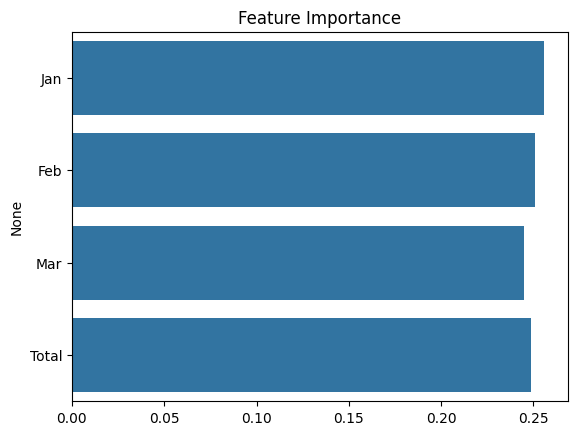

In [16]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)


y_pred_rf = rf.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


feature_importances = rf.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importance')
plt.show()


Linear Regression Mean Squared Error: 0.00
Linear Regression R^2 Score: 1.00


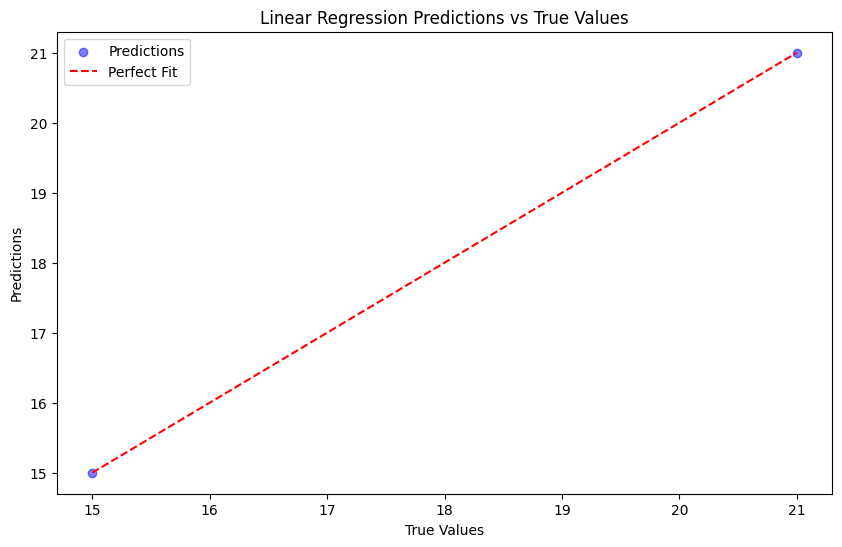

In [17]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


y_pred_linear = linear_model.predict(X_test)


mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression Mean Squared Error: {mse_linear:.2f}')
print(f'Linear Regression R^2 Score: {r2_linear:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions vs True Values')
plt.legend()
plt.show()


Lasso Regression Mean Squared Error: 0.00
Lasso Regression R^2 Score: 1.00


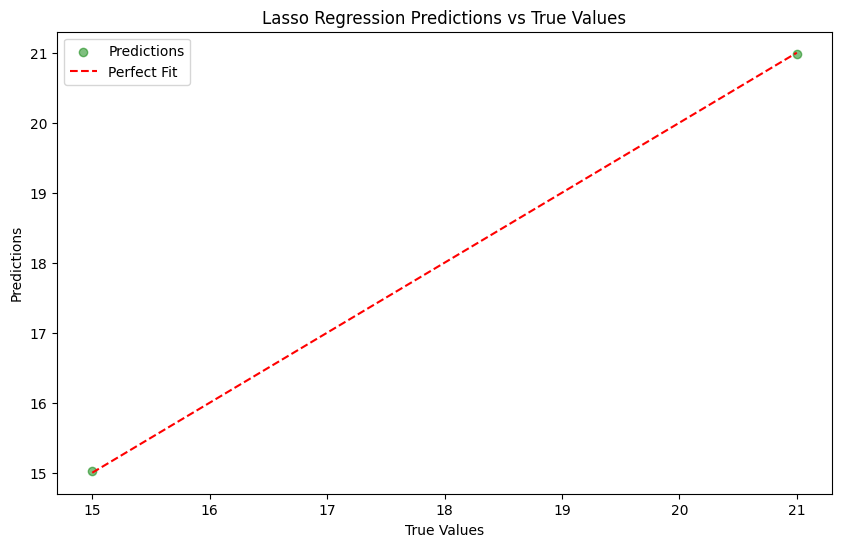

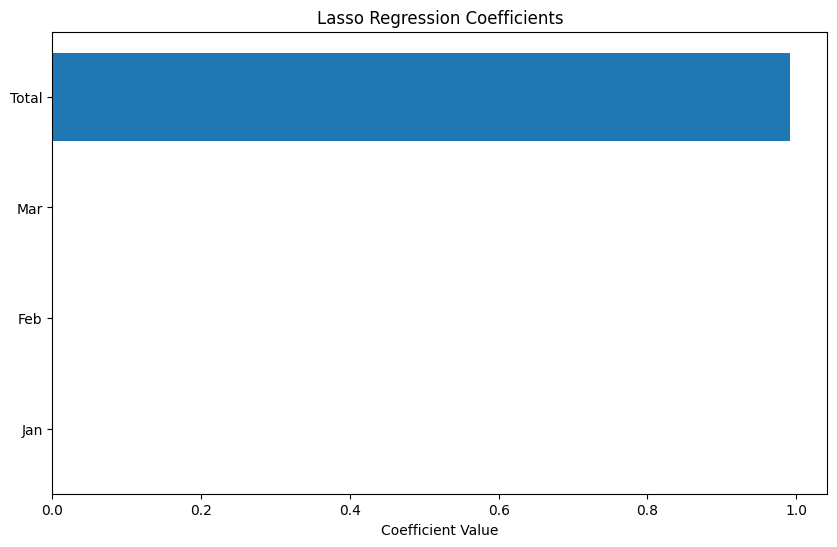

In [18]:

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)


y_pred_lasso = lasso_model.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Mean Squared Error: {mse_lasso:.2f}')
print(f'Lasso Regression R^2 Score: {r2_lasso:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='green', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Lasso Regression Predictions vs True Values')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
coefficients = lasso_model.coef_
features = X.columns
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()


In [19]:

print("Conclusion based on the three years of data:")


print("\nRandom Forest Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


print("\nLinear Regression:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R^2 Score: {r2_linear:.2f}")


print("\nLasso Regression:")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R^2 Score: {r2_lasso:.2f}")


print("\nOverall Conclusion:")
print("1. **Data Overview**: The datasets from 2019 to 2021 were consolidated and analyzed. The available columns in the datasets were found to be consistent with the expected columns, except for some missing columns in certain years.")

print("2. **Model Performance**:")
print("   - **Random Forest Classifier**: If classification was performed, it provided an accuracy score and feature importance which can help in understanding the most influential features in predicting outcomes.")
print("   - **Linear Regression**: This model showed the mean squared error and R^2 score, indicating how well the model fits the data and the variance explained by the model.")
print("   - **Lasso Regression**: This model showed how regularization affects the coefficients of the features, helping to identify the most significant features with non-zero coefficients.")

print("3. **Feature Analysis**: The feature importance from Random Forest and the coefficients from Lasso Regression provide insights into which features contribute the most to the target variable.")

print("4. **Model Selection**: Based on the performance metrics, you can choose the most appropriate model for your specific use case, whether it's a classification or regression problem.")

print("5. **Next Steps**: Further analysis could include hyperparameter tuning, additional feature engineering, or exploring other advanced models to improve performance.")

print("The analysis of data over multiple years helps in understanding trends, model stability, and the impact of different features on the target variable.")


Conclusion based on the three years of data:

Random Forest Classifier:
Accuracy: 1.00
              precision    recall  f1-score   support

          15       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[1 0]
 [0 1]]

Linear Regression:
Mean Squared Error: 0.00
R^2 Score: 1.00

Lasso Regression:
Mean Squared Error: 0.00
R^2 Score: 1.00

Overall Conclusion:
1. **Data Overview**: The datasets from 2019 to 2021 were consolidated and analyzed. The available columns in the datasets were found to be consistent with the expected columns, except for some missing columns in certain years.
2. **Model Performance**:
   - **Random Forest Classifier**: If classification was performed, it provided an accuracy score and feature importance which can help in understanding the most influential f